# Frequentist A/B Testing

## Example 1

Note : If you wanted to inspect how long a user was on the site for, posisson distribution would be advised.

Suppose you have an online shop selling clothes. You currently have two images of models modelling your outfits. You want to know which image will increase the rate at which individuals will click the link to go to your shop. After 1000 random individuals have visited the website, we noticed that s525 individuals have visited the site with image 1 and 475 individuals have visited the site with image 2. Furthermore, we record that of the 525 who visited site1 78 of them have clicked to go to shop whereas, 65 of the individuals who visited site 2 has clicked to visit the shop.

Let's start our A/B Test. Let our null hypothesis be that image 1 iss better than image 2. We will use the binomial distribution because we have two discree variables wih some unknown factors. We can try to estimate the true click rate based on our small sample.

In [3]:
# importing the dependencies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, binom
sns.set()


In [2]:
# constants
confidence_interval = 0.95
site1, site2 = 550, 450
click_1, click_2 = 78, 65
rate_1, rate_2 = click_1 / site1, click_2 / site2
clicks = np.arange(15, 120)

In [4]:
def prob_distrib_visualization(clicks, site1, site2, rate1, rate2):
    prob_a = binom(site1, rate1).pmf(clicks)
    prob_b = binom(site2, rate2).pmf(clicks)
    
    plt.plot(clicks, prob_a, label="Image 1", alpha=0.7, color = 'navy')
    plt.plot(clicks, prob_b, label="Image 2", alpha=0.7, color = 'maroon')
    plt.legend()
    plt.xlabel("Converted")
    plt.ylabel("Probability")
    plt.show()
    
def z_score(rate1, rate2, std1, std2):
    return (rate2 - rate1) / np.sqrt(std1**2 + std2**2)

def sigma(rate, site):
    return np.sqrt(rate * (1 - rate) / site)

def pval(p_val, ci = 0.05):
    if p_val < ci:
        print('Fail to accept null hypothesis')
    else:
        print('Accept null hypothesis')

def frequentist_a_b_test(click1, click2, site1, site2, ci = 0.055):
    rate1 = click1 / site1
    rate2 = click2 / site2
    
    std1 = sigma(rate1, site1)
    std2 = sigma(rate2, site2)
    z = z_score(rate1, rate2, std1, std2)
    p = norm.cdf(z)
    
    pval(norm.cdf(z), ci)
    return p

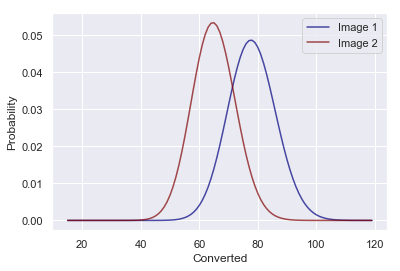

In [5]:
prob_distrib_visualization(clicks, site1, site2, rate_1, rate_2)

In [6]:
frequentist_a_b_test(45, 55, 50, 100)

Fail to accept null hypothesis


4.324584493014294e-08

## Example 2

The mortgage department of a large bank is interested in the nature of loans of first-time borrowers. This information will be used to tailor their marketing strategy. They believe that 50% of first-time borrowers take out smaller loans than other borrowers. They perform a hypothesis test to determine if the percentage is the same or different from 50%. They sample 100 first-time borrowers and find 53 of these loans are smaller that the other borrowers. For the hypothesis test, they choose a 5% level of significance.  

**Null Hypothesis** : p = 0.5  
**Alternative Hypothesis** : p != 0.5  

This will be ran as a two tailed test. 

Given that our significance level is 5% and that it is a two tailed test, our confidence interval will be 1 - 0.05/2 = 0.975. Resulting in the p critical value of 1.96

In [3]:
import numpy as np
from scipy.stats import norm

# calculate the confidence interval and p critical value
significance_level = 0.05
conf_interval = 1 - (significance_level / 2)

p_crticial = norm.ppf(conf_interval)
print(p_crticial)

1.959963984540054


“Is 0.53 significantly different from .50?” Putting these values into the formula for the test statistic we find that 0.53 is only 0.60 standard deviations away from .50. This is barely off of the mean of the standard normal distribution of zero. There is virtually no difference from the sample proportion and the hypothesized proportion in terms of standard deviations.

In [4]:
# test statistics
n = 100   
p1 = 53 / 100
p0 = 50 / 100
p = 0.5
q = 1 - p

def test_statistic(n, p1, p0, p, q):
    '''
    Calculates the test statistic of a normal disribution 
    '''
    z = (p1 - p0) / np.sqrt((p * q) / n)
    return z

test_statistic(n , p1, p0, p, q)

0.6000000000000005

The test statisic is within the critical values, hence we fail to reject the null hypothesis. This implies that at a 95% level of significance we cannot reject the null hypothesis that 50% of first-time borrowers have the same size loans as other borrowers

In [8]:
# std_1 = np.sqrt(rate_1 * (1 - rate_1) / site1)
# std_2 = np.sqrt(rate_2 * (1 - rate_2) / site2)

# click_rate = np.linspace(0, 0.2, 200)
# prob_1 = norm(rate_1, std_1).pdf(click_rate)
# prob_2 = norm(rate_2, std_2).pdf(click_rate)

# # Make the bar plots.
# plt.plot(click_rate, prob_1, label="Image 1")
# plt.plot(click_rate, prob_2, label="Image 2")
# plt.xlabel("Converted")
# plt.ylabel("Probability")

# z_score = (rate_2 - rate_1) / np.sqrt(std_1**2 + std_2**2)
# p = norm(rate_2 - rate_1, np.sqrt(std_1**2 + std_2**2))

# x = np.linspace(-0.05, 0.15, 1000)
# y = p.pdf(x)
# area_under_curve = p.sf(0)
# plt.plot(x, y, label="PDF")
# plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
# plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
# plt.legend()
# plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

# print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

How can we interpret this result? Clearly, we can fail to accept our null hypothesis (null hypothesis is false) as the p-value is substantially below our p-critical value. 

In [8]:
# top down and botttom up linkage methods for hiearchical clustering